# Plot a timeseries of winds in SOG and JdF. Calculate the percent winds above thresholds based on timeseries vectors.  

## define libraries and import data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import math
import numpy as np
import arrow
import cmocean

In [2]:
%matplotlib inline

In [3]:
ds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
ds

<xarray.Dataset>
Dimensions:    (gridX: 256, gridY: 266, time: 37224)
Coordinates:
  * time       (time) datetime64[ns] 2014-09-12 ... 2018-12-10T23:00:00
  * gridY      (gridY) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
  * gridX      (gridX) float64 0.0 2.5e+03 5e+03 ... 6.35e+05 6.375e+05
Data variables:
    atmpres    (time, gridY, gridX) float32 ...
    precip     (time, gridY, gridX) float32 ...
    qair       (time, gridY, gridX) float32 ...
    solar      (time, gridY, gridX) float32 ...
    tair       (time, gridY, gridX) float32 ...
    therm_rad  (time, gridY, gridX) float32 ...
    u_wind     (time, gridY, gridX) float32 ...
    v_wind     (time, gridY, gridX) float32 ...
Attributes:
    acknowledgement:           MEOPAR, ONC, Compute Canada, Environment Canada
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    coverage_content_type:     modelResult
    creator_email:             sallen@eos.ubc.ca
    creator_name:

## Choose two locations for analysis and extract time series
### SOG location [142,124]
### JdF location [120,106]

In [4]:
sog_ix = 142
sog_iy = 124
jdf_ix = 120
jdf_iy = 106
ds.u_wind

<xarray.DataArray 'u_wind' (time: 37224, gridY: 266, gridX: 256)>
[2534805504 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2014-09-12 ... 2018-12-10T23:00:00
  * gridY    (gridY) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
  * gridX    (gridX) float64 0.0 2.5e+03 5e+03 ... 6.325e+05 6.35e+05 6.375e+05
Attributes:
    _ChunkSizes:  [  1 266 256]
    level:        10 m above ground
    long_name:    U-Component of Wind
    short_name:   UGRD_10maboveground
    units:        m/s

### I can't seem to extract full record, for some reason; taking last 600 days instead

In [5]:
u_sog = ds.u_wind[36960-600:36960, sog_iy, sog_ix]
v_sog = ds.v_wind[36960-600:36960, sog_iy, sog_ix]

u_jdf = ds.u_wind[36960-600:36960, jdf_iy, jdf_ix]
v_jdf = ds.v_wind[36960-600:36960, jdf_iy, jdf_ix]

wspd_sog = np.sqrt(u_sog**2 + v_sog**2)
wspd_jdf = np.sqrt(u_jdf**2 + v_jdf**2)

In [6]:
time = ds.time[36960-600:36960]
time

<xarray.DataArray 'time' (time: 600)>
array(['2018-11-05T00:00:00.000000000', '2018-11-05T01:00:00.000000000',
       '2018-11-05T02:00:00.000000000', ..., '2018-11-29T21:00:00.000000000',
       '2018-11-29T22:00:00.000000000', '2018-11-29T23:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-11-05 ... 2018-11-29T23:00:00
Attributes:
    _ChunkSizes:                 1
    _CoordinateAxisType:         Time
    actual_range:                [  1.41048000e+09   1.54448280e+09]
    axis:                        T
    ioos_category:               Time
    long_name:                   verification time generated by wgrib2 functi...
    reference_date:              2018.12.09 18:00:00 UTC
    reference_time:              1544378400.0
    reference_time_description:  kind of product unclear, reference date is v...
    reference_time_type:         0
    standard_name:               time
    time_origin:                 01-JAN-1970 00:00:00
    time_st

### plot up time series of wind speed in SOG and JdF

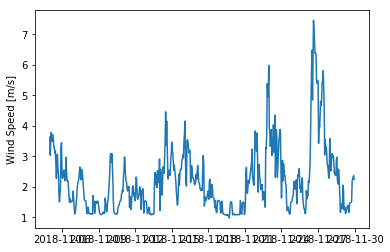

In [10]:
fig = plt.figure() 
ax  = plt.subplot()
ax.plot(time,wspd_sog)
ax.set_ylabel('Wind Speed [m/s]')
#ax.title("SoG location")
fig.savefig('SoG_wind_ts.jpeg',dpi=224,quality=50)

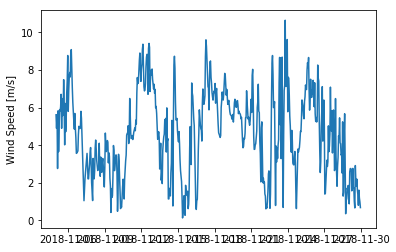

In [11]:
fig = plt.figure() 
ax  = plt.subplot()
ax.plot(time,wspd_jdf)
ax.set_ylabel('Wind Speed [m/s]')
#ax.title("SoG location")
fig.savefig('JdF_wind_ts.jpeg',dpi=224,quality=50)

### Calculate percent time with winds > 7m/s (50% reduction in skimmer efficiency)

In [12]:
thresh = 7
wspd_size = time.shape
total = wspd_size[0]
total

600

In [14]:
wspd_sog_thresh =  wspd_sog[wspd_sog > thresh]
percent_sog = 100 * len(wspd_sog_thresh) / total
percent_sog

0.3333333333333333

In [15]:
wspd_jdf_thresh =  wspd_jdf[wspd_jdf > thresh]
percent_jdf = 100 * len(wspd_jdf_thresh) / total
percent_jdf

15.5